#Overfitting - Regularization

### $$J(W) = Cost(X, y, W) + \lambda R(W)$$
$$J(W) = error(\hat{y}, y) + \lambda ||W||_i $$

In [ ]:
# %matplotlib inline #Jupyter Notebook
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
#plotting setup
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 150
plt.style.use('Solarize_Light2')
np.random.seed(42)
np.set_printoptions(precision=2, linewidth=50)

## Regression with Regularization

### Generate data

In [ ]:
def f(x):

  '''
  This function computes (x) = 0.5 + np.cos(8 * (x - 1))

  Parameters
  ----------
  x : float
      Input number.

  Returns
  -------
  float
      Result of the function.
  '''
  return 0.2 + np.cos(8 * (x - 1))

In [ ]:
def generate_data(n_samples=100):
    x = np.sort(np.random.rand(n_samples))
    y = f(x) + 0.3 * np.random.randn(n_samples)
    return x, y

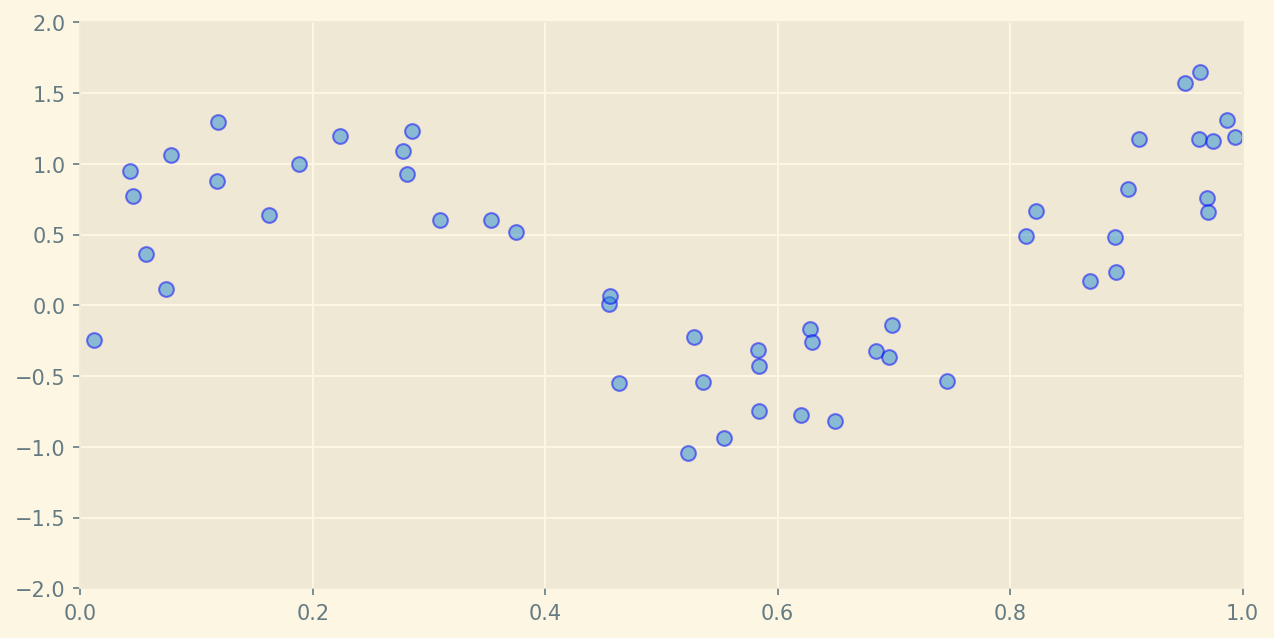

In [ ]:
n_samples = 50 # number of data samples
x, y = generate_data(n_samples)

# plot data
plt.figure()
plt.scatter(x, y, s=50, edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.show()

### Polynomial Regression

In [ ]:
def fit_poly(x, y, degree=1):

    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)

    # create and fit the model
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(x[:, None], y)
    return model

In [ ]:
degrees = [1, 3, 5, 7, 10, 20]

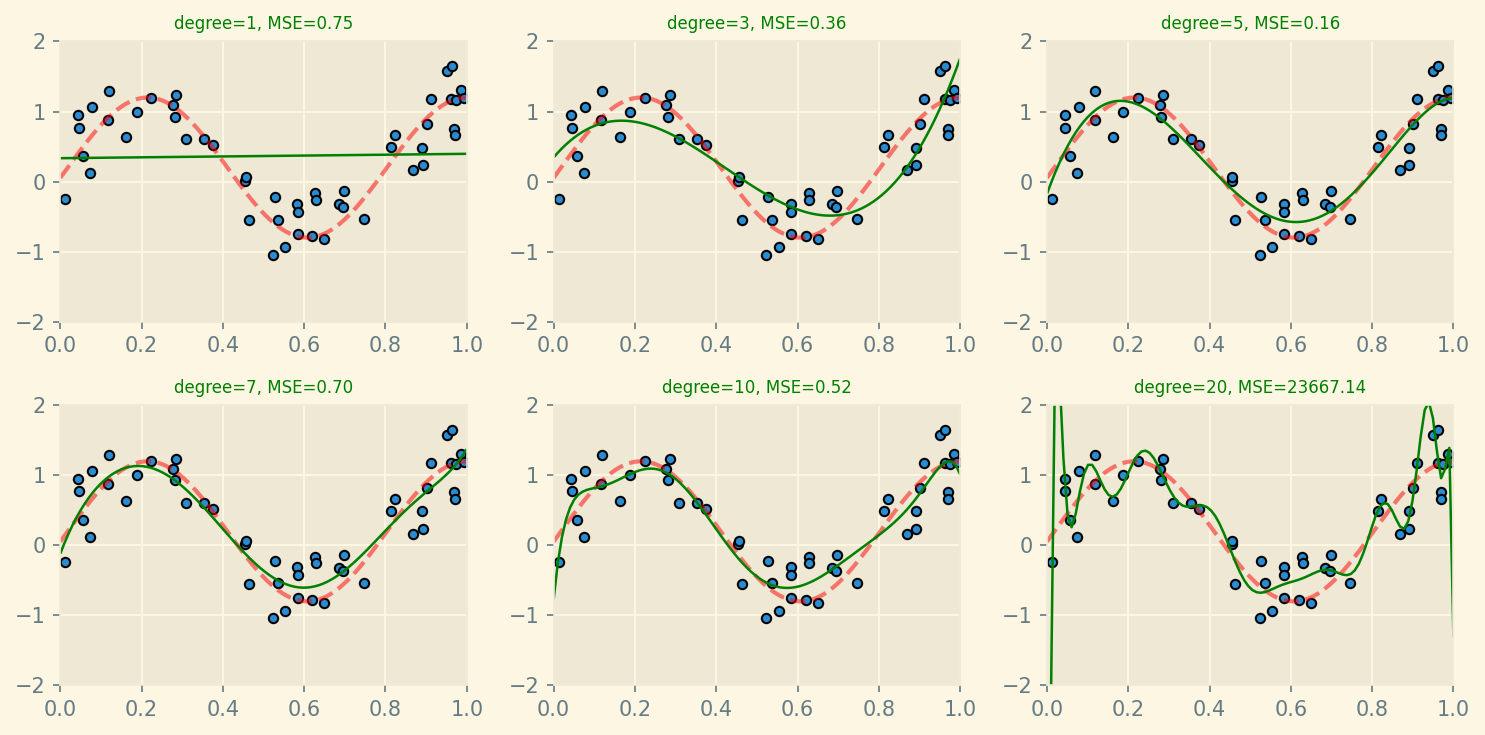

In [ ]:
plt.figure()

for d in degrees:
    model = fit_poly(x, y, degree=d)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

    # plot data and model
    plt.subplot(2, 3, degrees.index(d) + 1)
    plt.tight_layout()

    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=20, edgecolor= 'k', alpha=0.99, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("degree={}, MSE={:.2f}".format(d, -scores.mean()), fontsize=8, color="green")

plt.show()

In [ ]:
def plot_coef(weight):
    plt.figure()
    plt.bar(np.arange(1, len(weight) + 1), height=np.abs(weight), color="g")
    plt.show()

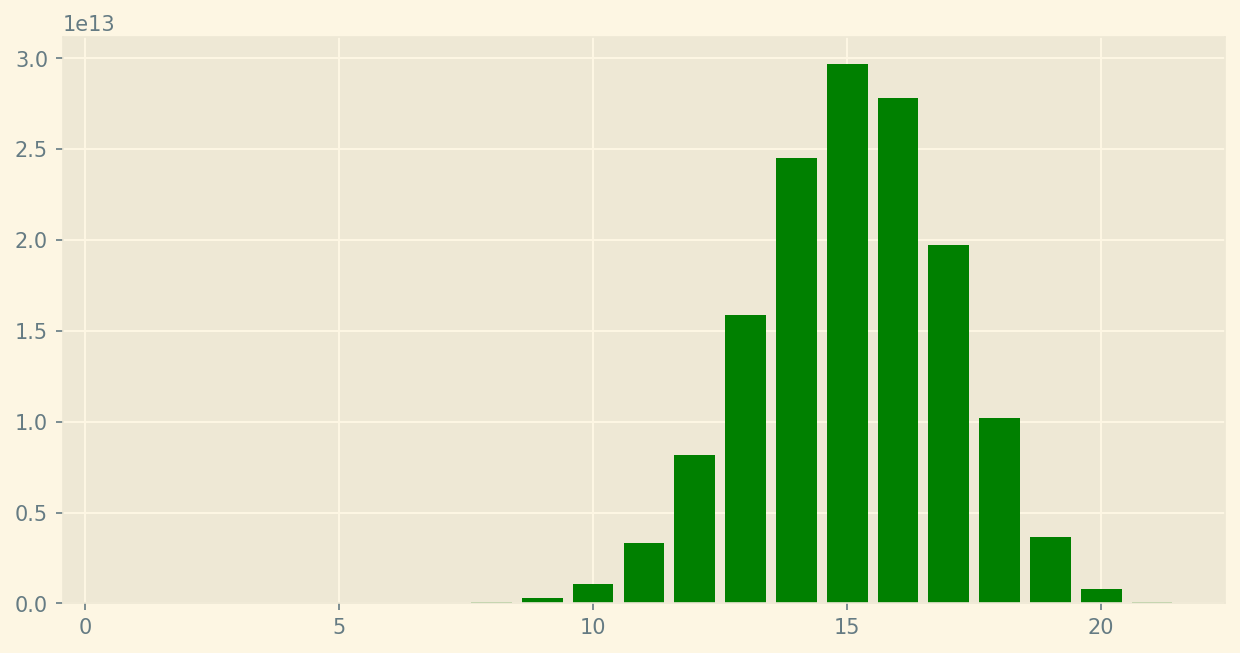

In [ ]:
plot_coef(model.steps[1][1].coef_)

### L2-Regularizarion (Ridge)

$$J(W) = \frac{1}{2m} \sum_{i=1}^{m} (h_W(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} W_j^2$$

In [ ]:
def fit_poly_L2_reg(degree=1, lmbda=1.0):
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

    # create and fit the model
    linear_regression = Ridge(alpha=lmbda)
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(x[:, None], y)
    return model

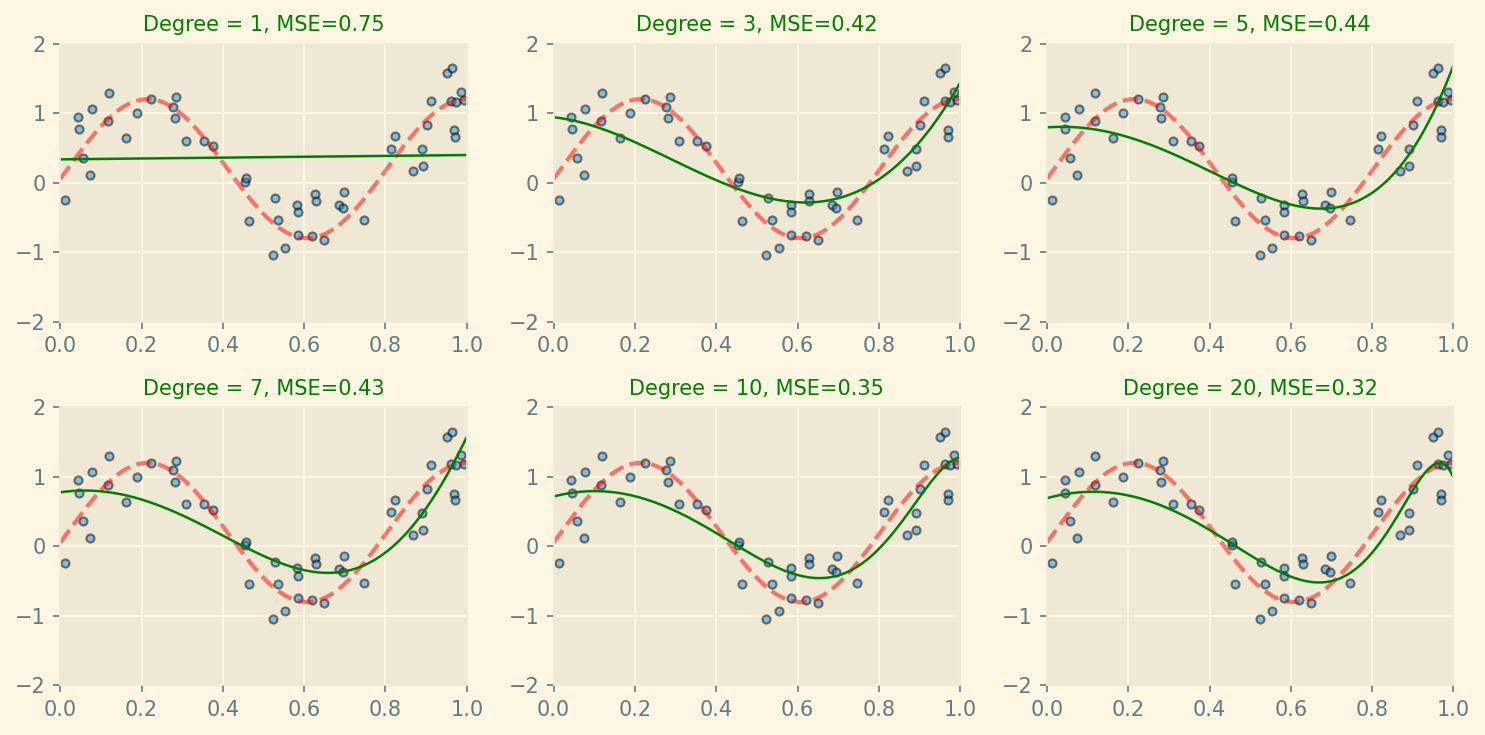

In [ ]:
lmbda = 0.01
plt.figure()
for d in degrees:
    model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

    # plot data and model
    plt.subplot(2, 3, degrees.index(d) + 1)
    plt.tight_layout()

    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("Degree = {}, MSE={:.2f}".format(d, -scores.mean()), fontsize=10, color="green")

plt.show()

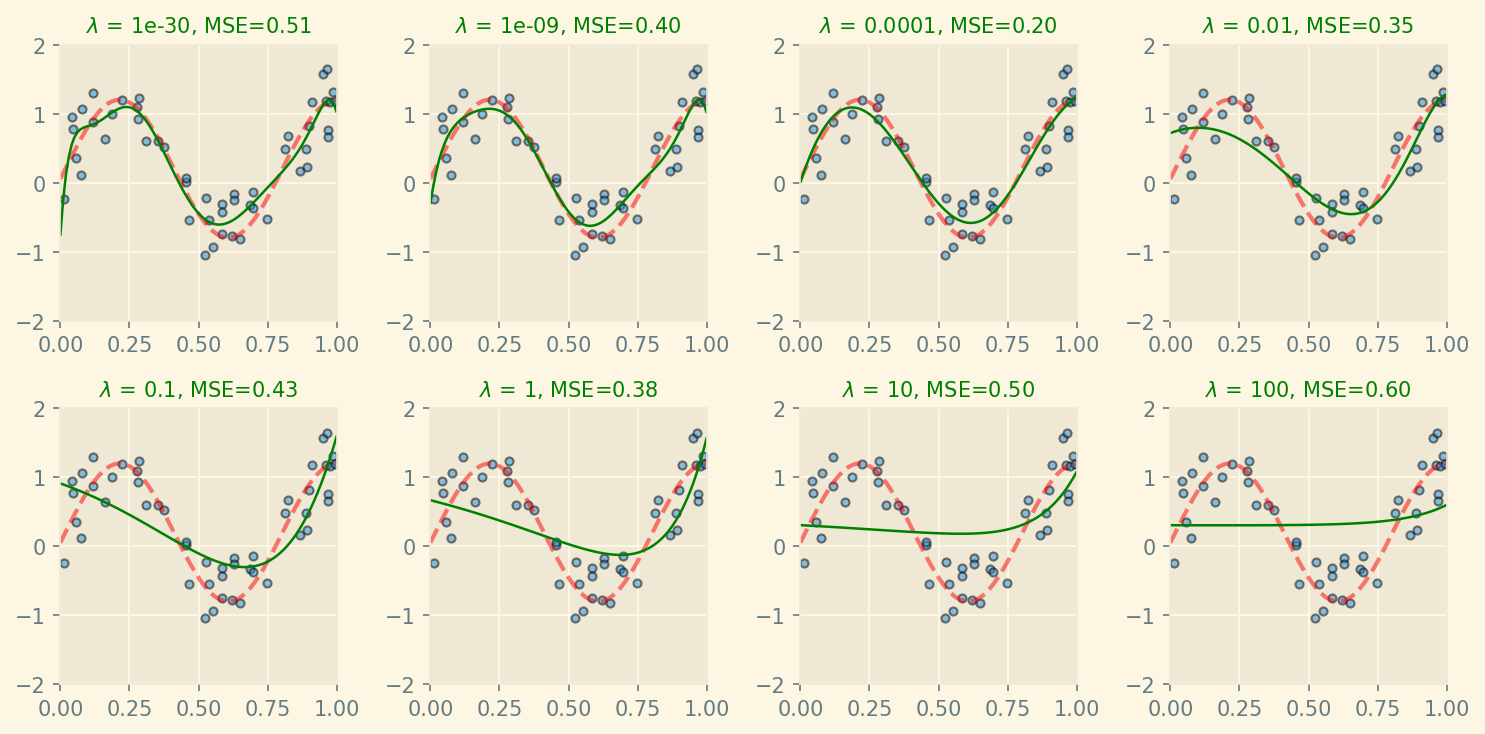

In [ ]:
#The effect of lambda analysis for L2
lmbdas = [1e-30, 1e-9, 1e-4, 1e-2, 1e-1, 1, 10, 100]
plt.figure()
d = 10
for lmbda in lmbdas:
    model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

    # plot data and model
    plt.subplot(2, 4, lmbdas.index(lmbda) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=10, color="green")

plt.show()

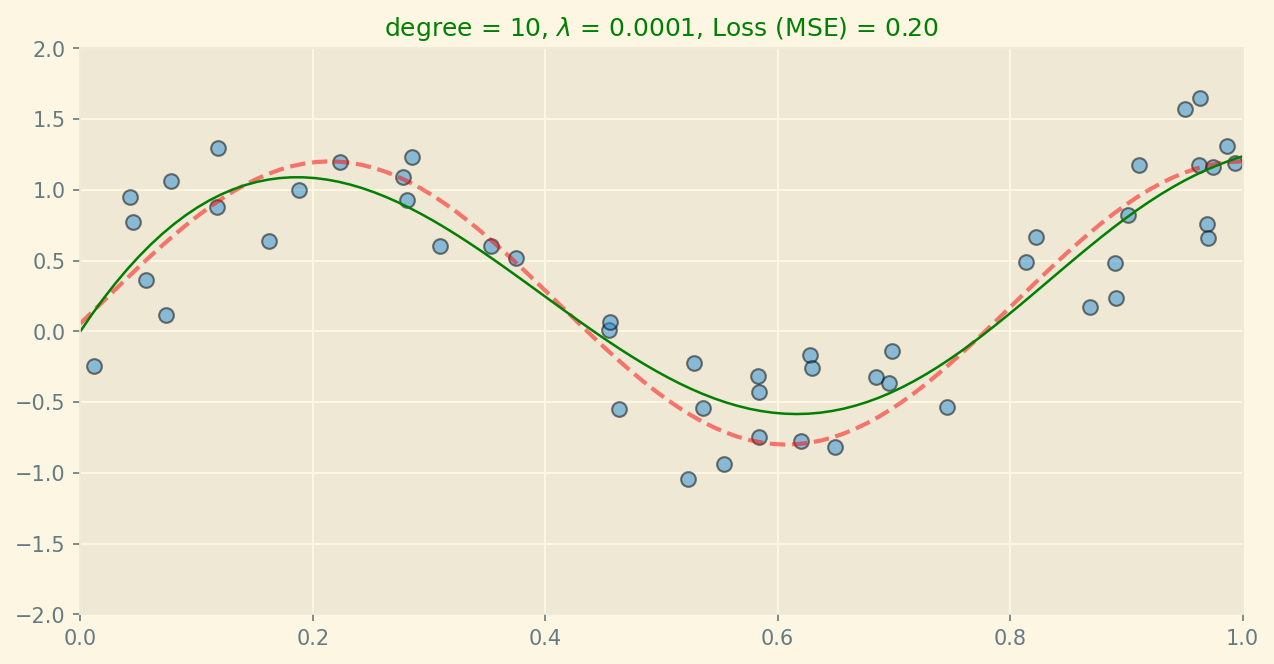

In [ ]:
#degree = 10
lmbda = 1e-4 #0.0001

# fit
model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig, ax = plt.subplots(1)

x_test = np.linspace(0, 1, 100)
ax.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
ax.scatter(x, y, s=50, edgecolor='k', alpha=0.5, label="Samples")
ax.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.set_title("degree = %d, $\lambda$ = %s, Loss (MSE) = %.2f" % (d, lmbda, -scores.mean()), fontsize=12, color="green")
plt.show()

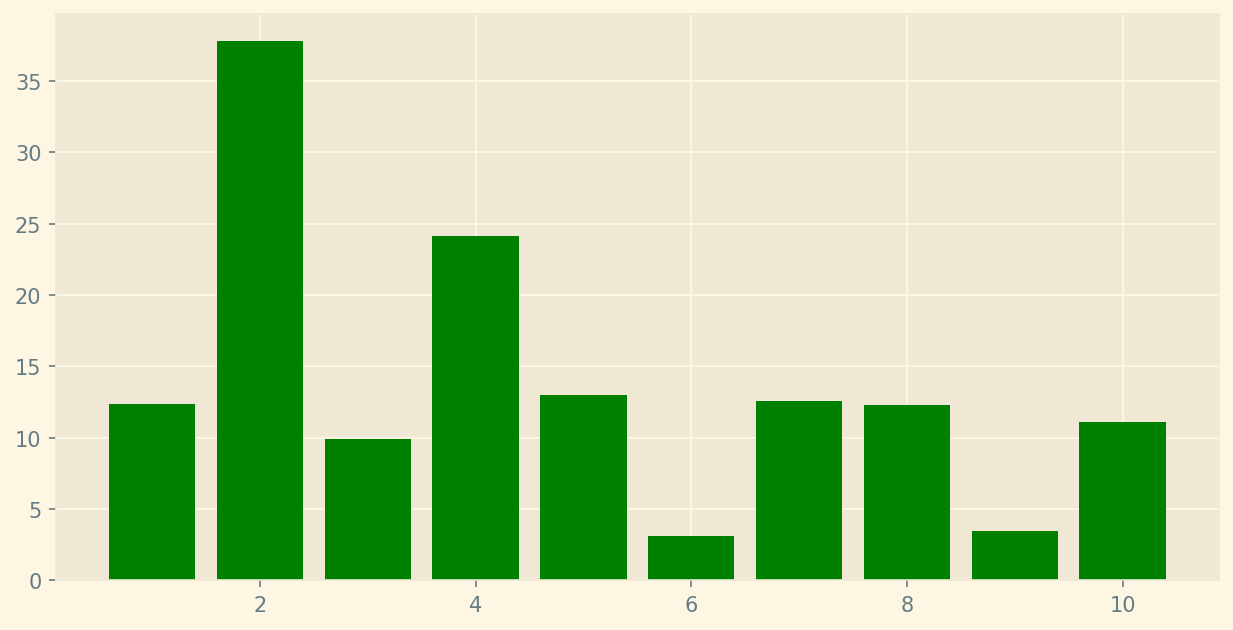

In [ ]:
plot_coef(model.steps[1][1].coef_)

### L1-Regularizarion (Lasso)

$$J(W) = \frac{1}{2m} \sum_{i=1}^{m} (h_W(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{m} \sum_{j=1}^{n} |W_j|$$

In [ ]:
def fit_poly_L1_reg(degree=1, lmbda=1.0):

    # add polynomial features up to degree
    polynomial_features = PolynomialFeatures(degree=degree)
    l1_regression = Lasso(alpha=lmbda)
    model = Pipeline([("poly", polynomial_features), ("l1_reg", l1_regression)])

    # create and fit the model
    model.fit(x[:, None], y)
    return model

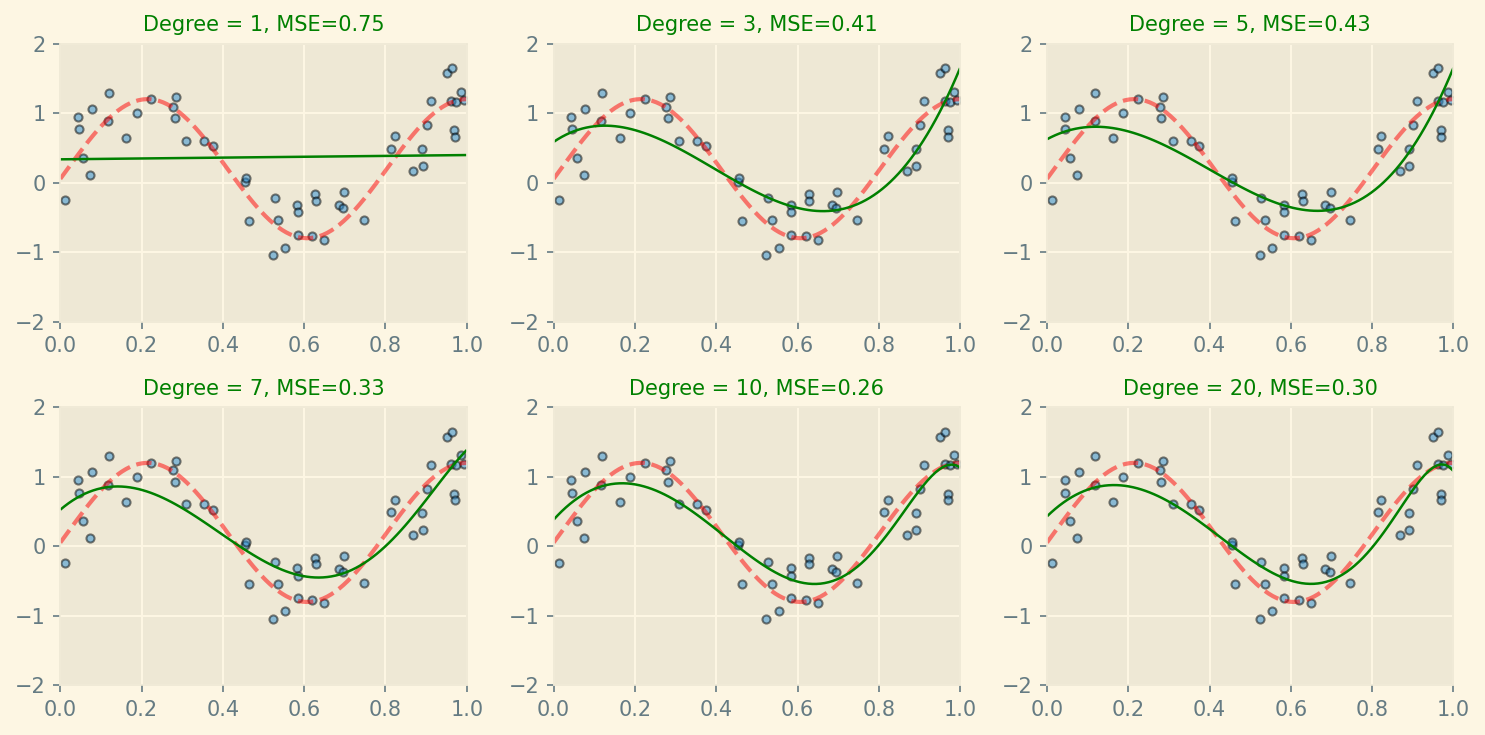

In [ ]:
lmbda = 1e-4
plt.figure()

for d in degrees:
    model = fit_poly_L1_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

    # plot data and model
    plt.subplot(2, 3, degrees.index(d) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("Degree = {}, MSE={:.2f}".format(d, -scores.mean()), fontsize=10, color="green")

plt.show()

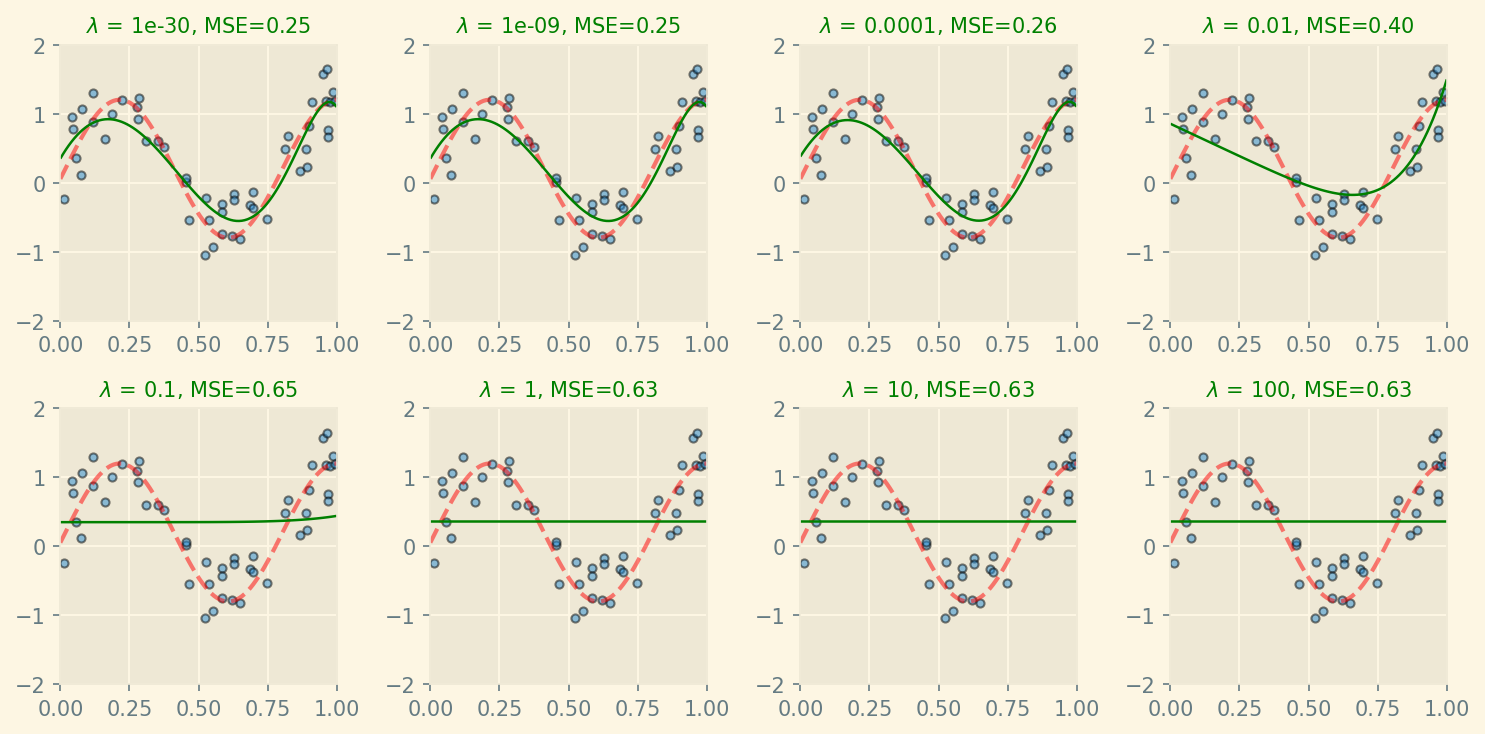

In [ ]:
#The effect of lambda analysis for L2
lmbdas = [1e-30, 1e-9, 1e-4, 1e-2, 1e-1, 1, 10, 100]

plt.figure()

for lmbda in lmbdas:
    model = fit_poly_L1_reg(degree=11, lmbda=lmbda)

    # plot data and model
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

    # plot data and model
    plt.subplot(2, 4, lmbdas.index(lmbda) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=10, color="green")
plt.show()

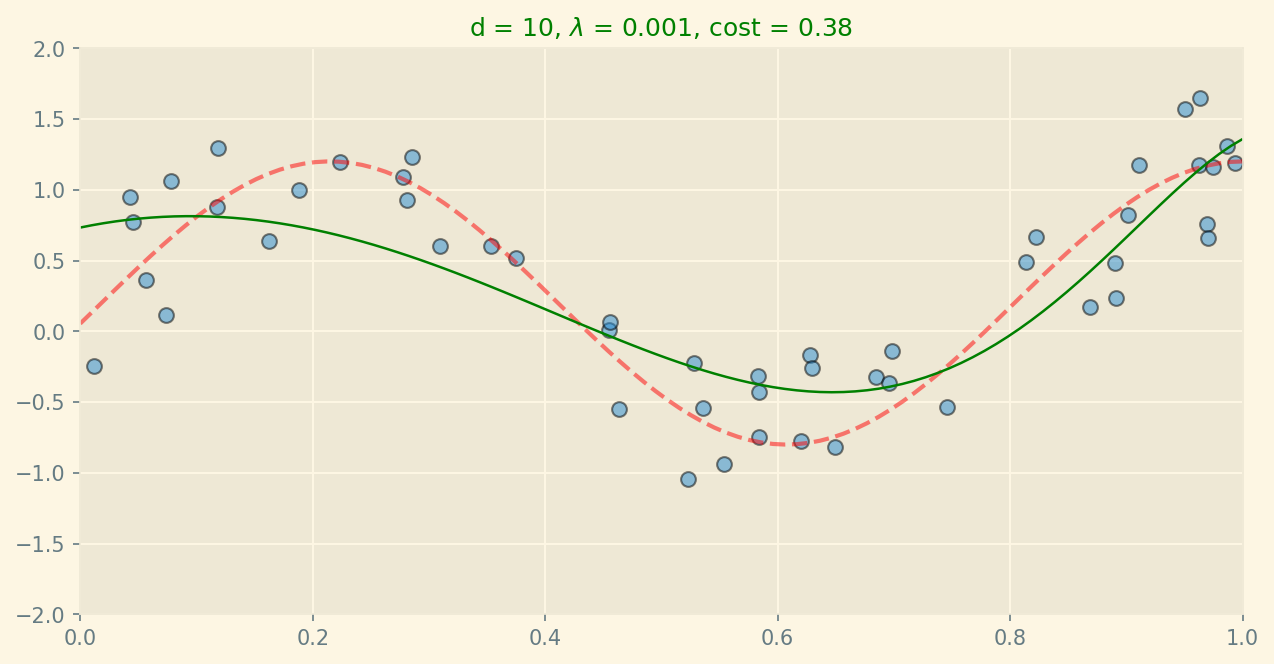

In [ ]:
degree = 10
lmbda = 1e-3
# fit
model = fit_poly_L1_reg(degree=degree, lmbda=lmbda)
scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig, ax = plt.subplots(1)
x_test = np.linspace(0, 1, 100)
ax.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
ax.scatter(x, y, s=50, edgecolor='k', alpha=0.5, label="Samples")
ax.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.set_title("d = %d, $\lambda$ = %s, cost = %.2f" % (degree, lmbda, -scores.mean()), fontsize=12, color="green")
plt.show()

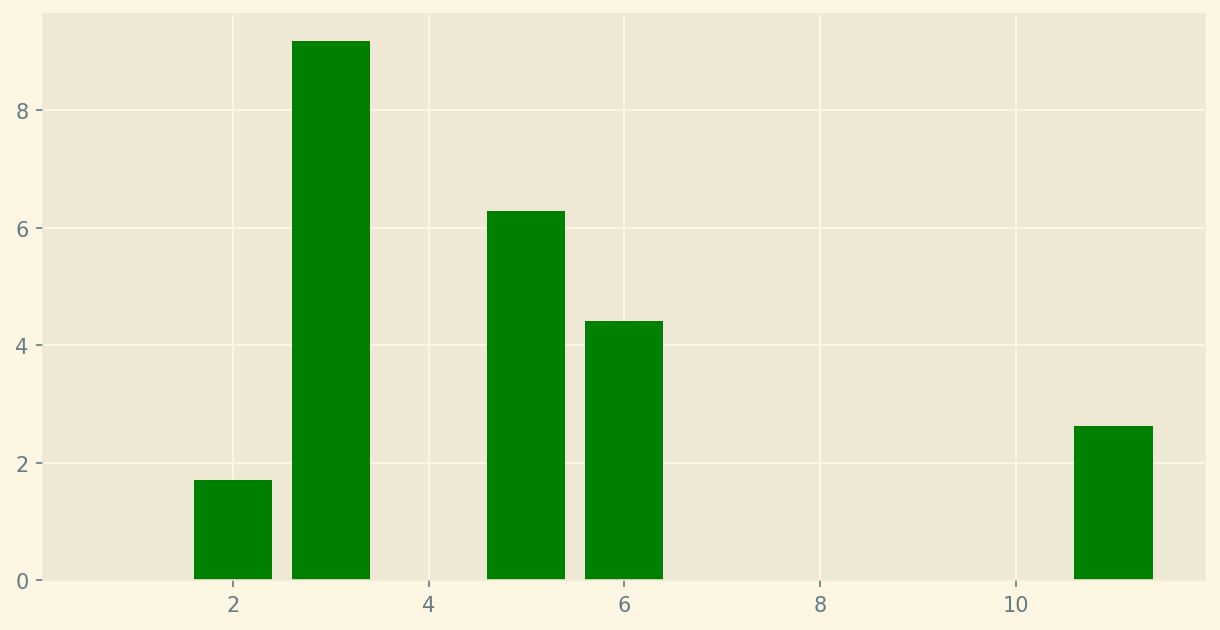

In [ ]:
plot_coef(model.steps[1][1].coef_)